<a href="https://colab.research.google.com/github/John-Akech/students-exams-score/blob/master/students_exams_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Sample dataset with missing values and errors
data = {
    'Hours Studied': [1, 4, 3, 0, 5, 6, 7, 8, 9, np.nan],
    'Score': [50, 55, 60, np.nan, 70, 75, 80, 'Error', 90, 95]
}

In [3]:
# Create a DataFrame
df = pd.DataFrame(data)

In [4]:
df

,Hours Studied,Score
0,1.0,50
1,4.0,55
2,3.0,60
3,0.0,NaN
4,5.0,70
5,6.0,75
6,7.0,80
7,8.0,Error
8,9.0,90
9,NaN,95


In [5]:
df.head()

,Hours Studied,Score
0,1.0,50
1,4.0,55
2,3.0,60
3,0.0,NaN
4,5.0,70


In [6]:
#Checking null values
df.isnull().sum()

,0
Hours Studied,1
Score,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours Studied  9 non-null      float64
 1   Score          9 non-null      object 
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


In [8]:
df.describe()

,Hours Studied
count,9.000000
mean,4.777778
std,3.073181
min,0.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,9.000000


In [9]:
# Step 1: Data Cleaning
# Replace non-numeric values in the 'Score' column with the mean value
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours Studied  9 non-null      float64
 1   Score          8 non-null      float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [11]:
df.isnull().sum()

,0
Hours Studied,1
Score,2


In [12]:
# Handle missing values in 'Hours Studied' and 'Score' by replacing them with the mean
df['Hours Studied'].fillna(df['Hours Studied'].mean(), inplace=True)
df['Score'].fillna(df['Score'].mean(), inplace=True)

In [13]:
df

,Hours Studied,Score
0,1.000000,50.000
1,4.000000,55.000
2,3.000000,60.000
3,0.000000,71.875
4,5.000000,70.000
5,6.000000,75.000
6,7.000000,80.000
7,8.000000,71.875
8,9.000000,90.000
9,4.777778,95.000


In [14]:
# Step 2: Prepare the data (split to X and Y)
x = df['Hours Studied'].values  # Independent variable (hours studied)
y = df['Score'].values  # Dependent variable (score)

In [15]:
# Initializing m and b, where y = mx+b and j(w,b) = (1 / N) * np.sum((y - y_pred) ** 2)
m = 0
b = 0

# Learning rate and number of iterations
alpha = 0.01
iterations = 1000
N = len(x)

In [16]:
# Step 3: Gradient Descent to minimize cost function
for i in range(iterations):
    # Predictions using the current m and b
    y_pred = m * x + b

    # Cost function (MSE)
    cost_func = (1 / N) * np.sum((y - y_pred) ** 2)

    # Gradients
    gradient_m = -(2 / N) * np.sum((y - y_pred) * x)
    gradient_b = -(2 / N) * np.sum(y - y_pred)

    # Update m and b
    m = m - alpha * gradient_m
    b = b - alpha * gradient_b

    # Print the cost and updated parameters every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Cost_func = {cost_func}, m = {m}, b = {b}")

# Final model parameters
print(f"\nFinal model parameters: m = {m}, b = {b}")

Iteration 0: Cost_func = 5350.703125, m = 7.297777777777778, b = 1.4375
Iteration 100: Cost_func = 422.8586410828188, m = 8.315669516633765, b = 23.769192871452884
Iteration 200: Cost_func = 236.7083391146979, m = 6.207935522992575, b = 37.06560061662873
Iteration 300: Cost_func = 166.34536008947185, m = 4.912081633663232, b = 45.24035214726618
Iteration 400: Cost_func = 139.74884767472287, m = 4.1153789626639155, b = 50.266263195451764
Iteration 500: Cost_func = 129.69562817737457, m = 3.6255589673664903, b = 53.35623868517828
Iteration 600: Cost_func = 125.89561031466366, m = 3.324413211833596, b = 55.255983514637094
Iteration 700: Cost_func = 124.45924102413619, m = 3.139266082385736, b = 56.42396378796122
Iteration 800: Cost_func = 123.9163075924238, m = 3.0254359555685055, b = 57.14204860531158
Iteration 900: Cost_func = 123.71108410761735, m = 2.955452165866408, b = 57.583533634370774

Final model parameters: m = 2.9127603815036323, b = 57.85285005379045


In [17]:
# Step 4: Evaluate the model
# Use MSE to evaluate the model
y_pred_final = m * x + b

# Ensure there are no NaN or Inf values in the predictions
y_pred_final = np.nan_to_num(y_pred_final, nan=0.0, posinf=0.0, neginf=0.0)

mse = (1 / N) * np.sum((y - y_pred_final) ** 2)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 123.6335116535077


In [18]:
# Step 5: Calculate Accuracy
errors = np.abs(y - y_pred_final)  # Absolute errors

# We want to avoid dividing by zero, so we'll only compute the accuracy if the mean of y is non-zero
if np.mean(y) != 0:
    accuracy = 100 - (np.mean(errors) / np.mean(y) * 100)
else:
    accuracy = 0  # If the mean of y is zero, set accuracy to 0

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 87.64%


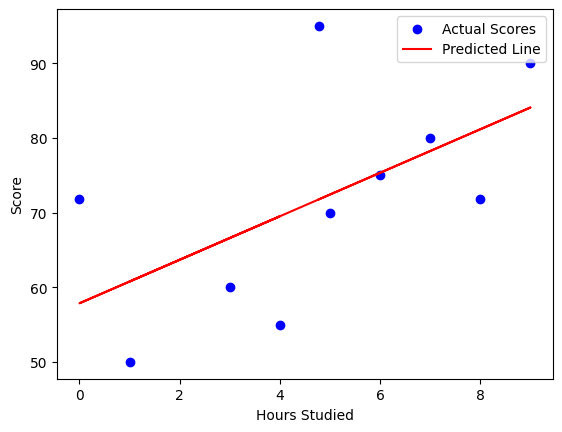

In [19]:
# Visualization of the model
plt.scatter(x, y, color='blue', label='Actual Scores')  # Scatter plot of actual data
plt.plot(x, m * x + b, color='red', label='Predicted Line')  # Line of predicted values
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.show()